In [ ]:
#Install Prohpet library if you don't have it 

In [7]:
#!pip install Prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.4/13.3 MB 8.1 MB/s eta 0:00:02
   ------- -------------------------------- 2.5/13.3 MB 26.7 MB/s eta 0:00:01
   ------------ --------------------------- 4.2/13.3 MB 33.4 MB/s eta 0:00:01
   ------------- -------------------------- 4.3/13.3 MB 30.6 MB/s eta 0:00:01
   -------------------- ------------------- 6.9/13.3 MB 27.5 MB/s eta 0:00:01
   ---------------------------- ----------- 9.4/13.3 MB 30.0 MB/s eta 0:00:01
   ------------------------------------- -- 12.5/13.3 MB 32.8 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 29.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/94.4 kB ? eta -:--:--
   ---------------------------------------- 94.4/94.4 kB ? eta 0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 32.6 MB/s eta 0:00:00
   ---------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.4 which is incompatible.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from prophet import Prophet

In [2]:
df = pd.read_csv(r"C:\Users\senay\Desktop\AbsentData\user_data.csv")
df.head()

,Date,Users
0,8/10/2021,1193.0
1,8/11/2021,1250.0
2,8/12/2021,1160.0
3,8/13/2021,817.0
4,8/14/2021,362.0


In [3]:
df.describe()

,Users
count,417.000000
mean,1029.026379
std,405.469726
min,175.000000
25%,634.000000
50%,1116.000000
75%,1356.000000
max,2205.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    417 non-null    object 
 1   Users   417 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.7+ KB


# Objectives
- 1. Create a forecast for 60 days
- 2. Find the significant days in our data
- 3. What are the trends 
- 4. Whats the seasonality?

In [9]:
df['Date']=pd.to_datetime(df['Date'])

In [10]:
ts = df

In [13]:
ts.columns = ['ds', 'y']
ts.head()

,ds,y
0,2021-08-10,1193.0
1,2021-08-11,1250.0
2,2021-08-12,1160.0
3,2021-08-13,817.0
4,2021-08-14,362.0


In [17]:
ts.isna().sum()

ds    1
y     1
dtype: int64

In [18]:
ts = ts.dropna()

In [21]:
ts.isna().sum()

ds    0
y     0
dtype: int64

<Axes: xlabel='ds'>

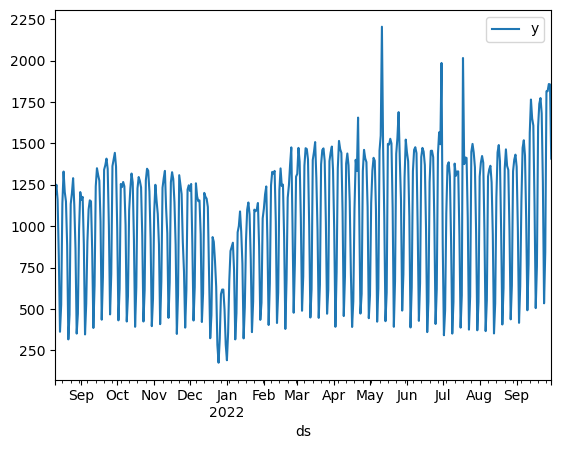

In [19]:
ts.set_index('ds').plot()

In [20]:
model = Prophet().fit(ts)
future = model.make_future_dataframe(60)
forecast = model.predict(future)
forecast.head()

11:56:07 - cmdstanpy - INFO - Chain [1] start processing
11:56:07 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-10,1002.046815,1133.048249,1505.550679,1002.046815,1002.046815,311.323226,311.323226,311.323226,311.323226,311.323226,311.323226,0.0,0.0,0.0,1313.370041
1,2021-08-11,1001.111953,1123.142272,1536.116583,1001.111953,1001.111953,326.595595,326.595595,326.595595,326.595595,326.595595,326.595595,0.0,0.0,0.0,1327.707549
2,2021-08-12,1000.177092,1070.940585,1456.340688,1000.177092,1000.177092,264.088220,264.088220,264.088220,264.088220,264.088220,264.088220,0.0,0.0,0.0,1264.265311
3,2021-08-13,999.242230,713.886375,1103.767000,999.242230,999.242230,-82.854985,-82.854985,-82.854985,-82.854985,-82.854985,-82.854985,0.0,0.0,0.0,916.387245
4,2021-08-14,998.307368,183.132012,561.376815,998.307368,998.307368,-625.529284,-625.529284,-625.529284,-625.529284,-625.529284,-625.529284,0.0,0.0,0.0,372.778084


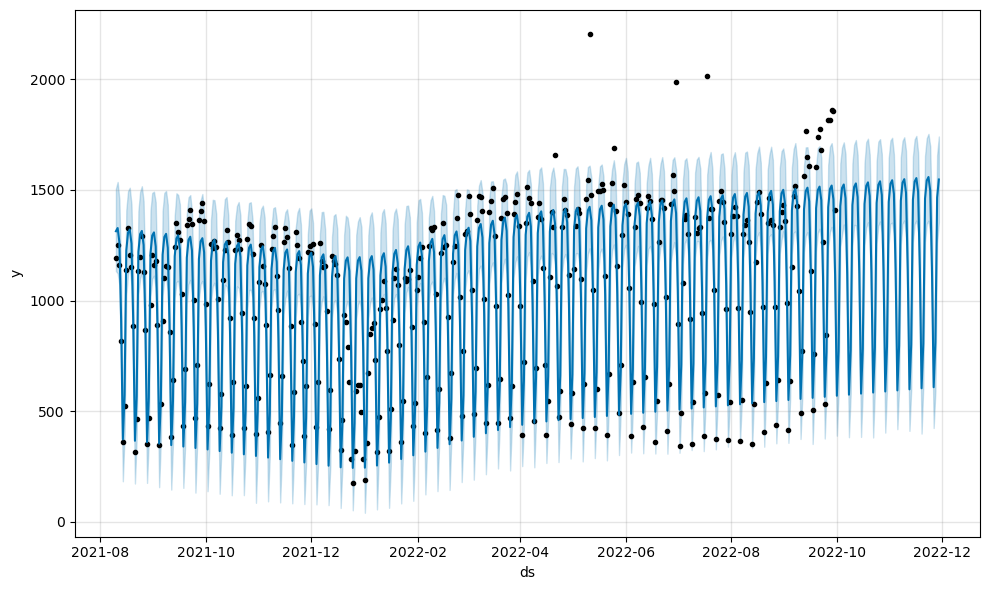

In [23]:
model.plot(forecast);

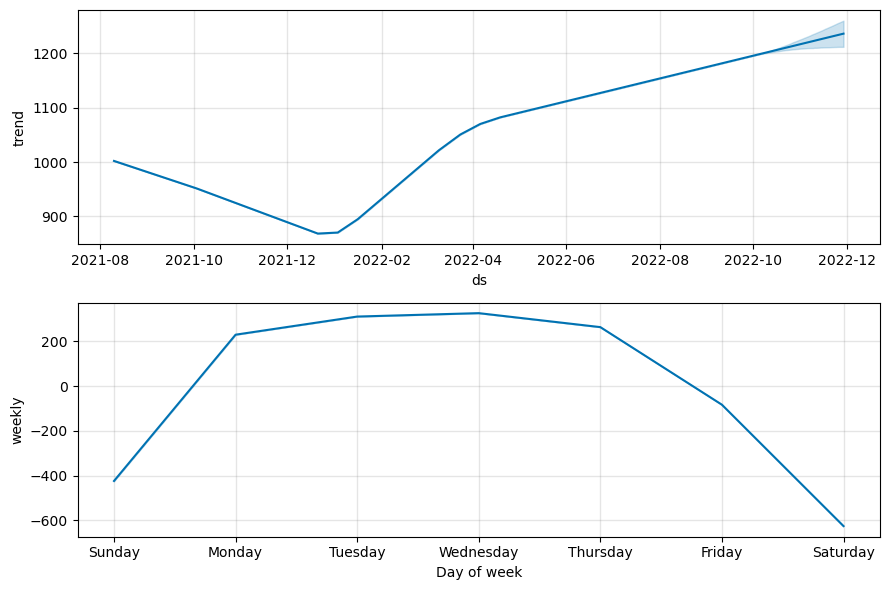

In [24]:
model.plot_components(forecast);

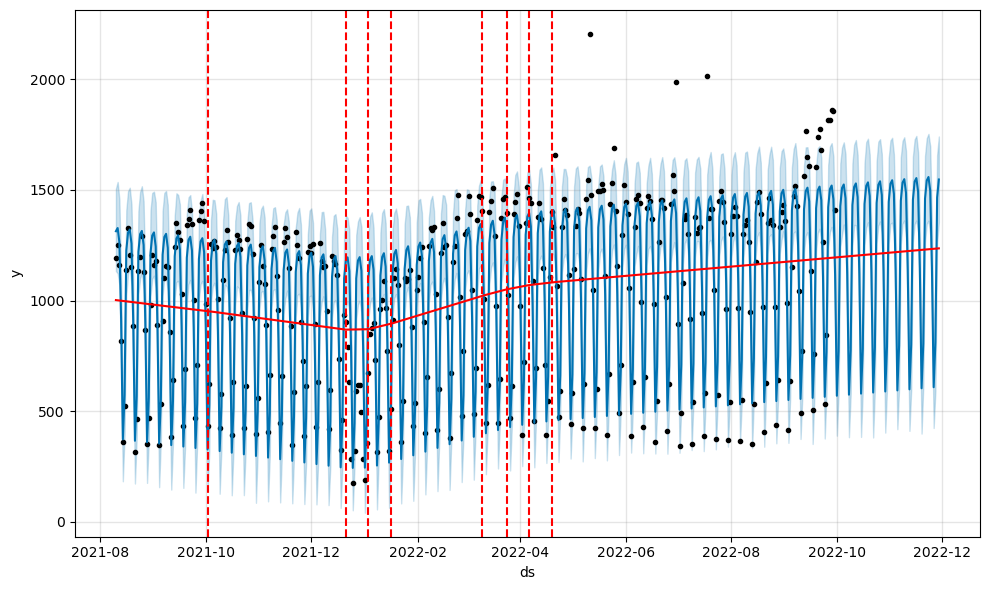

In [25]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast);

In [26]:
model.changepoints

13    2021-08-23
27    2021-09-06
40    2021-09-19
53    2021-10-02
66    2021-10-15
80    2021-10-29
93    2021-11-11
106   2021-11-24
120   2021-12-08
133   2021-12-21
146   2022-01-03
159   2022-01-16
173   2022-01-30
186   2022-02-12
199   2022-02-25
212   2022-03-10
226   2022-03-24
239   2022-04-06
252   2022-04-19
266   2022-05-03
279   2022-05-16
292   2022-05-29
305   2022-06-11
319   2022-06-25
332   2022-07-08
Name: ds, dtype: datetime64[ns]

In [27]:
model.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])